<a href="https://colab.research.google.com/github/mohyunyang/MyStudy/blob/master/ML_FE_and_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
print(df.head())
perch_full = df.to_numpy()
print(perch_full)

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_splits
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [ ]:
print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

(42, 3) (42,) (14, 3) (14,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])                        # fit은 방법만 제공
print(poly.transform([[2,3]]))           # transform 에서 fit이 제공한 방식으로 동작

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
print(train_poly)

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')


In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)
test_poly

array([[8.40000000e+00, 2.11000000e+00, 1.41000000e+00, 7.05600000e+01,
        1.77240000e+01, 1.18440000e+01, 4.45210000e+00, 2.97510000e+00,
        1.98810000e+00, 5.92704000e+02, 1.48881600e+02, 9.94896000e+01,
        3.73976400e+01, 2.49908400e+01, 1.67000400e+01, 9.39393100e+00,
        6.27746100e+00, 4.19489100e+00, 2.80322100e+00, 4.97871360e+03,
        1.25060544e+03, 8.35712640e+02, 3.14140176e+02, 2.09923056e+02,
        1.40280336e+02, 7.89090204e+01, 5.27306724e+01, 3.52370844e+01,
        2.35470564e+01, 1.98211944e+01, 1.32454427e+01, 8.85122001e+00,
        5.91479631e+00, 3.95254161e+00, 4.18211942e+04, 1.05050857e+04,
        7.01998618e+03, 2.63877748e+03, 1.76335367e+03, 1.17835482e+03,
        6.62835771e+02, 4.42937648e+02, 2.95991509e+02, 1.97795274e+02,
        1.66498033e+02, 1.11261719e+02, 7.43502481e+01, 4.96842890e+01,
        3.32013495e+01, 4.18227202e+01, 2.79478841e+01, 1.86760742e+01,
        1.24802202e+01, 8.33986280e+00, 5.57308367e+00],
       

## 다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991097
-144.40579242684848


# 규제

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
test_scaled

In [ ]:
ss.mean_, ss.scale_,     # 평균값, 표준편차

(array([2.84452381e+01, 8.04238095e+00, 4.82047619e+00, 8.85315000e+02,
        2.53486881e+02, 1.51959000e+02, 7.29365000e+01, 4.36999452e+01,
        2.62868381e+01, 2.97326070e+04, 8.59817581e+03, 5.15200651e+03,
        2.49680043e+03, 1.49567194e+03, 8.99184494e+02, 7.27945149e+02,
        4.36019840e+02, 2.62115117e+02, 1.58141990e+02, 1.05917983e+06,
        3.08429517e+05, 1.84644673e+05, 9.01239554e+04, 5.39478286e+04,
        3.23998082e+04, 2.64224658e+04, 1.58167367e+04, 9.49991053e+03,
        5.72489005e+03, 7.77162422e+03, 4.65285399e+03, 2.79521756e+03,
        1.68494739e+03, 1.01911272e+03, 3.93876111e+07, 1.15192532e+07,
        6.88842737e+06, 3.37865413e+06, 2.02034307e+06, 1.21184517e+06,
        9.93774754e+05, 5.94291271e+05, 3.56516573e+05, 2.14541208e+05,
        2.93110780e+05, 1.75313851e+05, 1.05196649e+05, 6.33244641e+04,
        3.82394901e+04, 8.66870097e+04, 5.18625239e+04, 3.11308026e+04,
        1.87477065e+04, 1.13270112e+04, 6.86569419e+03]),
 array

### 릿지(ridge) 와 라쏘(lasso)
- 선형회귀모델에 규제를 추가한 모델
- 릿지는 계수를 제곱한값을 기준으로 규제를 적용
- 라쏘는 계수의 절대값을 기준으로 규제 적용
- 일반적으로 릿지 선호
- 두 알고리즘 모두 계수의 크기를 줄임
- 라쏘는 아예 0 으로도 만듦, 릿지는 0에 가까워 질 뿐 0이 되진 않음
- 특성이 중요도가 비슷하면 릿지, 특정 특성이 중요하면 라쏘를 선호 


- Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델을 만듭니다
  ridge = Ridge(alpha = alpha)
  # 릿지 모델을 훈련합니다
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

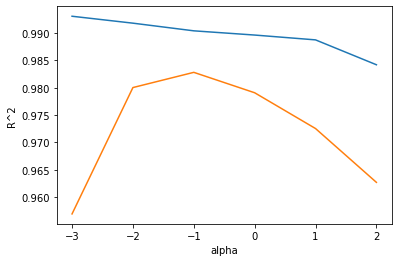

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


- Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델을 만듭니다
  lasso = Lasso(alpha=alpha, max_iter=1000)
  # 라쏘 모델을 훈련합니다
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

In [ ]:
print(train_score, test_score)

[0.9930455252088191, 0.9917809981250538, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494, 0.990856843502147, 0.990856843502147, 0.9907921500205304, 0.990137631128448, 0.989789897208096, 0.9888067471131867, 0.9078632190121442] [0.9836870822242811, 0.9836730006301534, 0.9819405116249363, 0.9800593698421883, 0.9824470598706695, 0.9089071866576974]


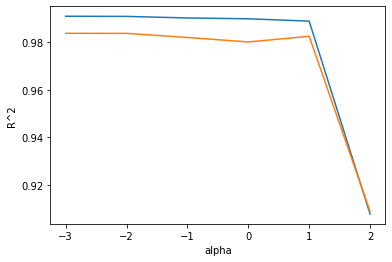

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(ridge.coef_)

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]


In [ ]:
print(lasso.coef_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
